In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [31]:
df = pd.read_excel(r"C:\Users\sharad sharma\OneDrive\Desktop\Credit Risk\Risk_Xplore\Session 5\Stocks_Holdings_Statement_8729407035_2025-10-26.xlsx",skiprows=10, nrows=40  )
df = df.iloc[:, 2:]

In [32]:
df = df[['SYMBOL', 'Quantity', 'Closing price']]
df.columns = ['Symbol', 'Quantity', 'Closing Price']

# Calculate market value and weights
df['MarketValue'] = df['Quantity'] * df['Closing Price']
df['Weight'] = df['MarketValue'] / df['MarketValue'].sum()

print(df.head())

       Symbol  Quantity  Closing Price  MarketValue    Weight
0         ACC        12        1850.10      22201.2  0.043625
1  ADANIPORTS        14        1429.00      20006.0  0.039312
2  ADANIPOWER        50         167.72       8386.0  0.016479
3   AMBUJACEM        20         555.00      11100.0  0.021812
4  BAJAJHLDNG         3       13144.00      39432.0  0.077484


In [33]:
import yfinance as yf

symbols = [s.strip() + ".NS" for s in df['Symbol']]

# ✅ auto_adjust=True already applies adjusted close prices
data = yf.download(
    symbols,
    start="2010-10-01",
    end="2025-10-26",
    auto_adjust=True
)

# Keep only the Close column
data = data['Close']

# Drop tickers with no data
data = data.dropna(axis=1, how='all')

print("✅ Data downloaded successfully for", data.shape[1], "stocks")


[*********************100%***********************]  39 of 39 completed


✅ Data downloaded successfully for 39 stocks


In [34]:
# Daily returns (percentage change)
daily_returns = data.pct_change().dropna()

print("✅ Daily returns calculated")
print(daily_returns.head())

✅ Daily returns calculated
Ticker        ACC.NS  ADANIPORTS.NS  ADANIPOWER.NS  AMBUJACEM.NS  \
Date                                                               
2024-05-31  0.019804       0.038959       0.082188      0.024065   
2024-06-03  0.053566       0.101955       0.157052      0.057961   
2024-06-04 -0.149378      -0.211497      -0.173299     -0.170244   
2024-06-05  0.052387       0.084591       0.005118      0.075997   
2024-06-06  0.021631      -0.001218       0.031239      0.018618   

Ticker      BAJAJHLDNG.NS  BANKINDIA.NS  BERGEPAINT.NS  BHARTIARTL.NS  \
Date                                                                    
2024-05-31      -0.004113      0.005076      -0.036750      -0.003195   
2024-06-03       0.007657      0.053225       0.025652       0.013367   
2024-06-04      -0.010088     -0.141645      -0.034125      -0.065703   
2024-06-05       0.014552      0.005157       0.042462       0.034354   
2024-06-06       0.010113      0.007696       0.004421    

C:\Users\sharad sharma\AppData\Local\Temp\ipykernel_32832\894727305.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


In [35]:
daily_returns.describe()

Ticker,ACC.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,BAJAJHLDNG.NS,BANKINDIA.NS,BERGEPAINT.NS,BHARTIARTL.NS,BHEL.NS,CANBK.NS,...,RTNPOWER.NS,SAIL.NS,SPARC.NS,TATACONSUM.NS,TATAMOTORS.NS,TATAPOWER.NS,TCS.NS,TITAGARH.NS,UNIONBANK.NS,UNITDSPR.NS
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,-0.000699,0.000394,0.001017,-0.000100,0.001706,0.000509,0.000542,0.001247,-0.000314,0.000651,...,-0.000927,-0.000182,-0.000918,0.000356,-0.001829,0.000003,-0.000371,-0.000775,0.000231,0.000575
std,0.016541,0.023008,0.032001,0.019413,0.021718,0.020664,0.015655,0.013888,0.025657,0.020882,...,0.031771,0.025256,0.027049,0.014676,0.028752,0.018441,0.013190,0.030909,0.023085,0.015268
min,-0.149378,-0.211497,-0.173299,-0.170244,-0.074501,-0.141645,-0.055475,-0.065703,-0.208380,-0.143470,...,-0.080709,-0.200180,-0.196485,-0.069700,-0.401513,-0.124740,-0.039730,-0.197856,-0.182353,-0.065905
25%,-0.008225,-0.010003,-0.012758,-0.008631,-0.011385,-0.010294,-0.008611,-0.006300,-0.014298,-0.009748,...,-0.019231,-0.013191,-0.015266,-0.007464,-0.010707,-0.008065,-0.006576,-0.018203,-0.011958,-0.008815
50%,-0.000254,-0.000596,-0.002379,-0.000088,-0.000426,0.000498,0.000898,0.000634,0.000503,-0.000603,...,-0.003333,0.000297,-0.001514,-0.000375,-0.001000,0.000685,-0.001072,-0.001856,-0.000741,0.000823
75%,0.007766,0.010341,0.007131,0.008843,0.012789,0.010039,0.008843,0.008052,0.013429,0.012617,...,0.013674,0.012091,0.008000,0.008394,0.009954,0.009042,0.005672,0.013569,0.010914,0.009556
max,0.053566,0.101955,0.199958,0.075997,0.117681,0.088713,0.046716,0.045026,0.088506,0.086864,...,0.196817,0.093950,0.134184,0.071000,0.061545,0.065813,0.066328,0.128299,0.063444,0.078488


In [36]:
# Average daily return for each stock
mean_daily_returns = daily_returns.mean()

# Trading days in a year (approx.)
trading_days = 252

# Annualized mean return
annual_returns = mean_daily_returns * trading_days

print("✅ Annualized mean returns for each stock:")
print(annual_returns.sort_values(ascending=False))


✅ Annualized mean returns for each stock:
Ticker
BAJAJHLDNG.NS    0.429909
BHARTIARTL.NS    0.314333
ADANIPOWER.NS    0.256342
JSWSTEEL.NS      0.224717
HDFCBANK.NS      0.224364
HINDALCO.NS      0.173933
GENESYS.NS       0.164737
CANBK.NS         0.164087
UNITDSPR.NS      0.144889
BERGEPAINT.NS    0.136485
BANKINDIA.NS     0.128390
INFY.NS          0.111252
ADANIPORTS.NS    0.099258
LT.NS            0.098400
HINDUNILVR.NS    0.091748
TATACONSUM.NS    0.089601
ONGC.NS          0.059472
UNIONBANK.NS     0.058238
RELIANCE.NS      0.042741
ITC.NS           0.041394
IOC.NS           0.031037
GAIL.NS          0.023077
NTPC.NS          0.020841
POWERGRID.NS     0.019595
NMDC.NS          0.017810
TATAPOWER.NS     0.000690
DABUR.NS        -0.019864
AMBUJACEM.NS    -0.025230
SAIL.NS         -0.045960
NHPC.NS         -0.051783
BHEL.NS         -0.079067
TCS.NS          -0.093501
HAVELLS.NS      -0.120086
EXIDEIND.NS     -0.124855
ACC.NS          -0.176118
TITAGARH.NS     -0.195420
SPARC.NS       

In [37]:
# Daily standard deviation of returns
daily_std = daily_returns.std()

# Annualized standard deviation (volatility)
trading_days = 252
annual_std = daily_std * (trading_days ** 0.5)

print("✅ Annualized standard deviation (volatility) for each stock:")
print(annual_std.sort_values(ascending=False))


✅ Annualized standard deviation (volatility) for each stock:
Ticker
GENESYS.NS       0.562884
ADANIPOWER.NS    0.508000
RTNPOWER.NS      0.504356
TITAGARH.NS      0.490666
TATAMOTORS.NS    0.456422
SPARC.NS         0.429391
BHEL.NS          0.407294
SAIL.NS          0.400934
UNIONBANK.NS     0.366461
ADANIPORTS.NS    0.365239
GAIL.NS          0.349898
NMDC.NS          0.347191
BAJAJHLDNG.NS    0.344760
CANBK.NS         0.331491
BANKINDIA.NS     0.328024
NHPC.NS          0.324936
ONGC.NS          0.316103
EXIDEIND.NS      0.308360
AMBUJACEM.NS     0.308172
TATAPOWER.NS     0.292740
HINDALCO.NS      0.287115
IOC.NS           0.280340
NTPC.NS          0.278261
POWERGRID.NS     0.267606
ACC.NS           0.262583
LT.NS            0.260530
JSWSTEEL.NS      0.254030
HAVELLS.NS       0.248754
INFY.NS          0.248593
BERGEPAINT.NS    0.248514
UNITDSPR.NS      0.242367
TATACONSUM.NS    0.232979
DABUR.NS         0.220631
BHARTIARTL.NS    0.220465
RELIANCE.NS      0.219256
TCS.NS           0.209

In [38]:
import numpy as np

# 1️⃣ Extract your portfolio weights as numpy array
weights = np.array(df['Weight'])

# Ensure weights sum to 1 (normalize if needed)
weights = weights / np.sum(weights)

# 2️⃣ Portfolio expected return (annual)
portfolio_return = np.dot(weights, annual_returns)

# 3️⃣ Covariance matrix (annualized)
cov_matrix_annual = daily_returns.cov() * 252

# 4️⃣ Portfolio standard deviation (annual)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_annual, weights)))

print("✅ Portfolio Expected Annual Return: {:.2f}%".format(portfolio_return * 100))
print("✅ Portfolio Annualized Volatility (Std Dev): {:.2f}%".format(portfolio_std * 100))


✅ Portfolio Expected Annual Return: 8.31%
✅ Portfolio Annualized Volatility (Std Dev): 19.80%


In [39]:
# Make sure weights sum to 1
weights = weights / np.sum(weights)

# Compute portfolio daily returns
daily_portfolio_returns = daily_returns.dot(weights)

print("✅ Daily portfolio returns calculated:")
print(daily_portfolio_returns.head())

# Optional summary
print("\nAverage daily return: {:.4f}%".format(daily_portfolio_returns.mean() * 100))
print("Standard deviation (daily): {:.4f}%".format(daily_portfolio_returns.std() * 100))


✅ Daily portfolio returns calculated:
Date
2024-05-31    0.014359
2024-06-03    0.043387
2024-06-04   -0.103443
2024-06-05    0.041452
2024-06-06    0.016442
dtype: float64

Average daily return: 0.0330%
Standard deviation (daily): 1.2473%


In [40]:
annual_return_port = daily_portfolio_returns.mean() * 252
annual_vol_port = daily_portfolio_returns.std() * np.sqrt(252)

print("\nAnnualized Portfolio Return: {:.2f}%".format(annual_return_port * 100))
print("Annualized Portfolio Volatility: {:.2f}%".format(annual_vol_port * 100))



Annualized Portfolio Return: 8.31%
Annualized Portfolio Volatility: 19.80%


In [41]:
# Daily covariance matrix
cov_matrix_daily = daily_returns.cov()

# Annualized covariance matrix
trading_days = 252
cov_matrix_annual = cov_matrix_daily * trading_days

print("✅ Annualized Covariance Matrix:")
print(cov_matrix_annual.head())  # shows first few rows


✅ Annualized Covariance Matrix:
Ticker           ACC.NS  ADANIPORTS.NS  ADANIPOWER.NS  AMBUJACEM.NS  \
Ticker                                                                
ACC.NS         0.068950       0.069745       0.068260      0.067691   
ADANIPORTS.NS  0.069745       0.133399       0.107809      0.083604   
ADANIPOWER.NS  0.068260       0.107809       0.258064      0.076783   
AMBUJACEM.NS   0.067691       0.083604       0.076783      0.094970   
BAJAJHLDNG.NS  0.019925       0.026639       0.041050      0.023847   

Ticker         BAJAJHLDNG.NS  BANKINDIA.NS  BERGEPAINT.NS  BHARTIARTL.NS  \
Ticker                                                                     
ACC.NS              0.019925      0.046422       0.023414       0.020424   
ADANIPORTS.NS       0.026639      0.066933       0.024163       0.031242   
ADANIPOWER.NS       0.041050      0.065479       0.023898       0.024982   
AMBUJACEM.NS        0.023847      0.054751       0.022796       0.025126   
BAJAJHLDNG.NS 

In [42]:
import numpy as np
import pandas as pd

# Number of portfolios to simulate
num_portfolios = 5000000  # (you can set 10_000 or 1_000_000 later)
num_stocks = len(daily_returns.columns)  # 39 in your case

# Step 5: Generate random numbers (like RAND() in Excel)
random_weights = np.random.rand(num_portfolios, num_stocks)

# Normalize each row so total = 1 (each portfolio sums to 100%)
weights = random_weights / random_weights.sum(axis=1)[:, np.newaxis]

# Convert to a DataFrame for easy viewing
weights_df = pd.DataFrame(weights, columns=daily_returns.columns)

# Display first few portfolios
print(weights_df.head())


Ticker    ACC.NS  ADANIPORTS.NS  ADANIPOWER.NS  AMBUJACEM.NS  BAJAJHLDNG.NS  \
0       0.031108       0.044363       0.004601      0.041723       0.011699   
1       0.015911       0.012491       0.012118      0.013162       0.012207   
2       0.000895       0.044853       0.033884      0.017810       0.007099   
3       0.013651       0.027674       0.047357      0.043569       0.022067   
4       0.024061       0.031573       0.007840      0.006803       0.009614   

Ticker  BANKINDIA.NS  BERGEPAINT.NS  BHARTIARTL.NS   BHEL.NS  CANBK.NS  ...  \
0           0.004923       0.011522       0.027079  0.016776  0.006047  ...   
1           0.042635       0.031192       0.042342  0.022082  0.010485  ...   
2           0.042348       0.032533       0.017703  0.044497  0.004322  ...   
3           0.045166       0.008552       0.011096  0.031476  0.037066  ...   
4           0.042257       0.021628       0.013925  0.048140  0.041398  ...   

Ticker  RTNPOWER.NS   SAIL.NS  SPARC.NS  TATACONSU

In [43]:
import numpy as np
import pandas as pd

# Assuming you already have these:
# mean_annual_returns = mean_daily_returns * 252
# cov_annual = cov_matrix * 252
# weights = normalized random weights from Step 5

# Portfolio expected return (vectorized)
portfolio_returns = np.dot(weights, annual_returns)

# Portfolio variance (efficient computation using Einstein summation)
portfolio_variance = np.einsum('ij,jk,ik->i', weights, cov_matrix_annual, weights)

# Portfolio standard deviation (risk)
portfolio_std_dev = np.sqrt(portfolio_variance)

# Create a results DataFrame
portfolio_results = pd.DataFrame({
    'Expected Annual Return': portfolio_returns,
    'Annualized Risk (Std Dev)': portfolio_std_dev
})

# Add weights for each stock
for i, symbol in enumerate(annual_returns.index):
    portfolio_results[symbol + ' Weight'] = weights[:, i]

# Display first few portfolios
print(portfolio_results.head())


   Expected Annual Return  Annualized Risk (Std Dev)  ACC.NS Weight  \
0                0.018401                   0.194688       0.031108   
1                0.047878                   0.192315       0.015911   
2                0.028376                   0.195359       0.000895   
3                0.044585                   0.202829       0.013651   
4                0.043285                   0.189421       0.024061   

   ADANIPORTS.NS Weight  ADANIPOWER.NS Weight  AMBUJACEM.NS Weight  \
0              0.044363              0.004601             0.041723   
1              0.012491              0.012118             0.013162   
2              0.044853              0.033884             0.017810   
3              0.027674              0.047357             0.043569   
4              0.031573              0.007840             0.006803   

   BAJAJHLDNG.NS Weight  BANKINDIA.NS Weight  BERGEPAINT.NS Weight  \
0              0.011699             0.004923              0.011522   
1           

In [44]:
portfolio_results['Check Sum'] = portfolio_results[[col for col in portfolio_results.columns if 'Weight' in col]].sum(axis=1)
print(portfolio_results['Check Sum'].head())


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Check Sum, dtype: float64


In [45]:
import numpy as np
import pandas as pd

# Assuming you already have:
# mean_annual_returns = mean_daily_returns * 252
# cov_annual = cov_matrix * 252
# weights = normalized random weights (from Step 5)

# Calculate annual portfolio returns and risks
portfolio_returns = np.dot(weights, annual_returns)
portfolio_variance = np.einsum('ij,jk,ik->i', weights, cov_matrix_annual, weights)
portfolio_risk = np.sqrt(portfolio_variance)

# Create a DataFrame
portfolios = pd.DataFrame({
    'Annual Portfolio Return': portfolio_returns,
    'Annual Portfolio Risk': portfolio_risk
})

print(portfolios.head())


   Annual Portfolio Return  Annual Portfolio Risk
0                 0.018401               0.194688
1                 0.047878               0.192315
2                 0.028376               0.195359
3                 0.044585               0.202829
4                 0.043285               0.189421


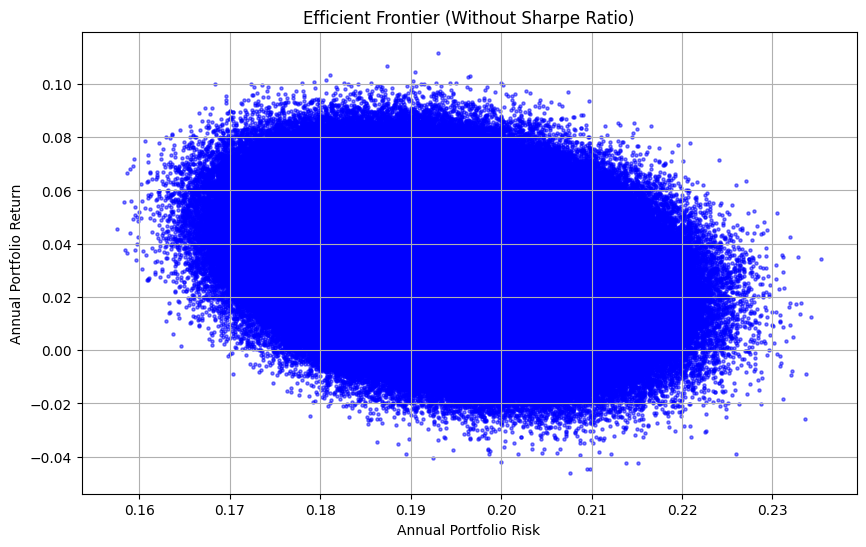

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Annual Portfolio Risk'],
            portfolios['Annual Portfolio Return'],
            c='blue', alpha=0.5, s=5)
plt.xlabel('Annual Portfolio Risk')
plt.ylabel('Annual Portfolio Return')
plt.title('Efficient Frontier (Without Sharpe Ratio)')
plt.grid(True)
plt.show()


✅ Global Minimum Variance (GMV) Portfolio
---------------------------------------------
Expected Annual Return : 9.71%
Annual Risk (Std Dev)  : 11.49%

Optimal Weights:
            Stock  Optimal Weight  Optimal Weight (%)
15    HDFCBANK.NS    2.201287e-01               22.01
17  HINDUNILVR.NS    1.997289e-01               19.97
35         TCS.NS    1.595850e-01               15.96
20         ITC.NS    1.308545e-01               13.09
6   BERGEPAINT.NS    9.770956e-02                9.77
7   BHARTIARTL.NS    5.345867e-02                5.35
14     HAVELLS.NS    4.173236e-02                4.17
5    BANKINDIA.NS    3.743311e-02                3.74
38    UNITDSPR.NS    3.127335e-02                3.13
10       DABUR.NS    1.007796e-02                1.01
4   BAJAJHLDNG.NS    8.238799e-03                0.82
18        INFY.NS    8.072134e-03                0.81
22          LT.NS    1.706960e-03                0.17
0          ACC.NS    5.134988e-17                0.00
1   ADANIPORTS.NS    

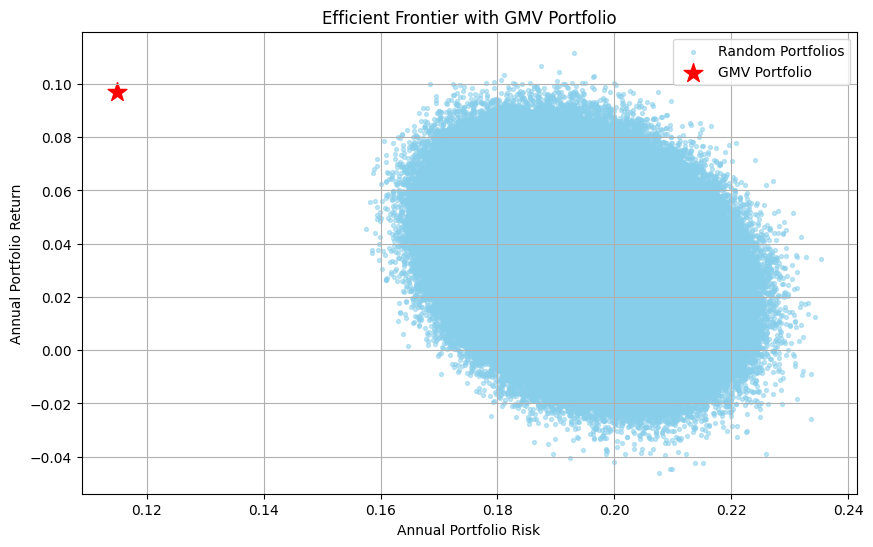

In [47]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ----- Inputs -----
# annual_returns       : Pandas Series of expected annual returns for each stock
# cov_matrix_annual    : Annualized covariance matrix
# df['Symbol']         : Stock tickers (or column names of returns DataFrame)

num_stocks = len(annual_returns)

# ----- Objective Function: Portfolio Volatility -----
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# ----- Constraints -----
# 1️⃣ Sum of weights = 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

# 2️⃣ Bounds (0 ≤ w ≤ 1)
bounds = tuple((0, 1) for _ in range(num_stocks))

# 3️⃣ Initial Guess (Equal Weights)
init_guess = np.array(num_stocks * [1. / num_stocks])

# ----- Optimization -----
opt_result = minimize(portfolio_volatility,
                      init_guess,
                      args=(cov_matrix_annual,),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

# ----- Extract Optimal Weights -----
optimal_weights = opt_result.x

# ----- Compute Portfolio Metrics -----
min_volatility = portfolio_volatility(optimal_weights, cov_matrix_annual)
expected_return = np.dot(optimal_weights, annual_returns)

# ----- Results -----
print("✅ Global Minimum Variance (GMV) Portfolio")
print("-" * 45)
print("Expected Annual Return : {:.2f}%".format(expected_return * 100))
print("Annual Risk (Std Dev)  : {:.2f}%".format(min_volatility * 100))

# Create DataFrame of Weights
gmv_portfolio = pd.DataFrame({
    'Stock': annual_returns.index,
    'Optimal Weight': optimal_weights
}).sort_values(by='Optimal Weight', ascending=False)

gmv_portfolio['Optimal Weight (%)'] = gmv_portfolio['Optimal Weight'] * 100
gmv_portfolio = gmv_portfolio.round({'Optimal Weight (%)': 2})

print("\nOptimal Weights:")
print(gmv_portfolio)

# ----- Plot the GMV Portfolio on Efficient Frontier (Optional) -----
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Annual Portfolio Risk'],
            portfolios['Annual Portfolio Return'],
            c='skyblue', s=8, alpha=0.5, label='Random Portfolios')

plt.scatter(min_volatility, expected_return,
            color='red', marker='*', s=200, label='GMV Portfolio')

plt.xlabel('Annual Portfolio Risk')
plt.ylabel('Annual Portfolio Return')
plt.title('Efficient Frontier with GMV Portfolio')
plt.legend()
plt.grid(True)
plt.show()


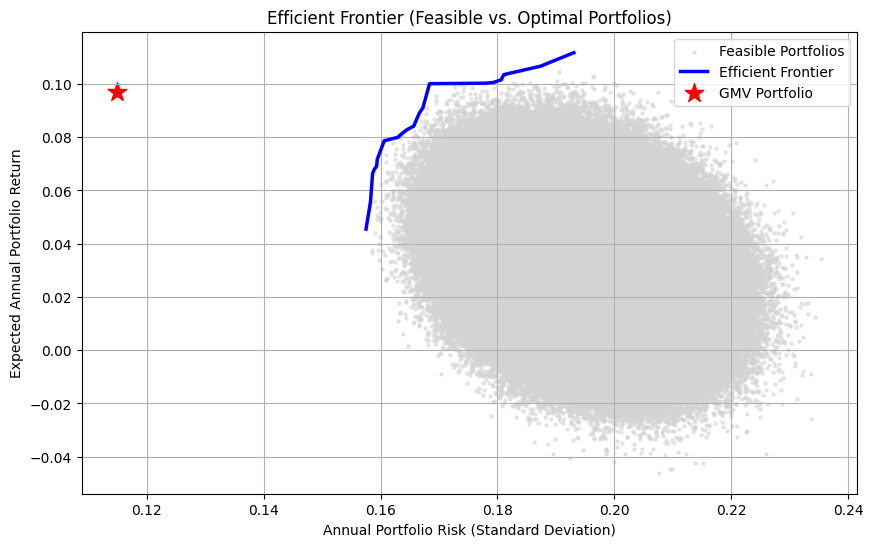

In [48]:
# ----- Identify Efficient Frontier -----
# Sort by risk
portfolios_sorted = portfolios.sort_values(by='Annual Portfolio Risk')

# Keep portfolios that have increasing returns (efficient ones)
efficient_frontier = portfolios_sorted[
    portfolios_sorted['Annual Portfolio Return'].cummax() == portfolios_sorted['Annual Portfolio Return']
]

# ----- Plot Efficient Frontier -----
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Annual Portfolio Risk'],
            portfolios['Annual Portfolio Return'],
            c='lightgray', alpha=0.5, s=5, label='Feasible Portfolios')

plt.plot(efficient_frontier['Annual Portfolio Risk'],
         efficient_frontier['Annual Portfolio Return'],
         color='blue', linewidth=2.5, label='Efficient Frontier')

plt.scatter(min_volatility, expected_return,
            color='red', marker='*', s=200, label='GMV Portfolio')

plt.xlabel('Annual Portfolio Risk (Standard Deviation)')
plt.ylabel('Expected Annual Portfolio Return')
plt.title('Efficient Frontier (Feasible vs. Optimal Portfolios)')
plt.legend()
plt.grid(True)
plt.show()


✅ Maximum Sharpe Ratio Portfolio
--------------------------------------------------
Expected Annual Return  : 32.56%
Annual Risk (Std Dev)   : 17.56%
Sharpe Ratio            : 1.48

Optimal Weights (Max Sharpe Ratio Portfolio):
            Stock  Optimal Weight  Optimal Weight (%)
7   BHARTIARTL.NS    4.825158e-01        4.825158e+01
4   BAJAJHLDNG.NS    2.811434e-01        2.811434e+01
15    HDFCBANK.NS    2.363409e-01        2.363409e+01
2   ADANIPOWER.NS    2.522557e-14        2.522557e-12
33  TATAMOTORS.NS    1.944753e-14        1.944753e-12
36    TITAGARH.NS    1.191642e-14        1.191642e-12
8         BHEL.NS    9.475734e-15        9.475734e-13
31       SPARC.NS    8.941117e-15        8.941117e-13
29    RTNPOWER.NS    8.061946e-15        8.061946e-13
0          ACC.NS    7.807346e-15        7.807346e-13
11    EXIDEIND.NS    7.629879e-15        7.629879e-13
1   ADANIPORTS.NS    7.378233e-15        7.378233e-13
30        SAIL.NS    6.556939e-15        6.556939e-13
3    AMBUJACEM.N

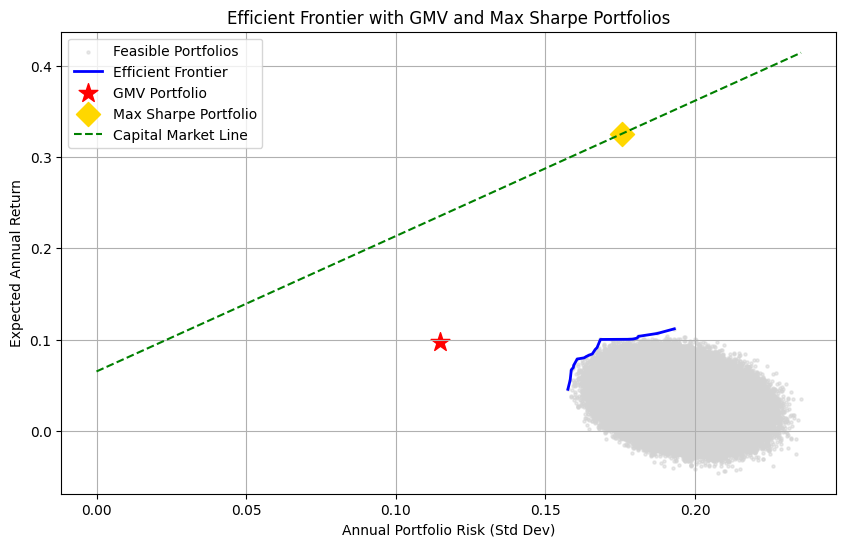

In [49]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

# ----- Risk-free rate -----
risk_free_rate = 0.065 # example 7% annual; change as needed (e.g., 0.06 for 6%)

num_stocks = len(annual_returns)

# ----- Define Sharpe Ratio objective -----
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std
    return -sharpe_ratio  # negative because we minimize

# ----- Constraints and bounds -----
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = tuple((0, 1) for _ in range(num_stocks))
init_guess = np.array(num_stocks * [1. / num_stocks])

# ----- Optimization -----
opt_sharpe = minimize(neg_sharpe_ratio,
                      init_guess,
                      args=(annual_returns, cov_matrix_annual, risk_free_rate),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)

# ----- Results -----
optimal_weights_sr = opt_sharpe.x
max_sharpe = -opt_sharpe.fun

# Portfolio metrics
portfolio_return_sr = np.dot(optimal_weights_sr, annual_returns)
portfolio_std_sr = np.sqrt(np.dot(optimal_weights_sr.T, np.dot(cov_matrix_annual, optimal_weights_sr)))

print("✅ Maximum Sharpe Ratio Portfolio")
print("-" * 50)
print("Expected Annual Return  : {:.2f}%".format(portfolio_return_sr * 100))
print("Annual Risk (Std Dev)   : {:.2f}%".format(portfolio_std_sr * 100))
print("Sharpe Ratio            : {:.2f}".format(max_sharpe))

# ----- Display optimal weights -----
sharpe_portfolio = pd.DataFrame({
    'Stock': annual_returns.index,
    'Optimal Weight': optimal_weights_sr,
    'Optimal Weight (%)': optimal_weights_sr * 100
}).sort_values(by='Optimal Weight', ascending=False)

print("\nOptimal Weights (Max Sharpe Ratio Portfolio):")
print(sharpe_portfolio)

# ----- Plot Efficient Frontier + Max Sharpe Portfolio -----
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Annual Portfolio Risk'],
            portfolios['Annual Portfolio Return'],
            c='lightgray', alpha=0.5, s=5, label='Feasible Portfolios')

plt.plot(efficient_frontier['Annual Portfolio Risk'],
         efficient_frontier['Annual Portfolio Return'],
         color='blue', linewidth=2, label='Efficient Frontier')

plt.scatter(min_volatility, expected_return,
            color='red', marker='*', s=200, label='GMV Portfolio')

plt.scatter(portfolio_std_sr, portfolio_return_sr,
            color='gold', marker='D', s=150, label='Max Sharpe Portfolio')

# Add Capital Market Line (CML)
x = np.linspace(0, max(portfolios['Annual Portfolio Risk']), 100)
cml = risk_free_rate + max_sharpe * x
plt.plot(x, cml, color='green', linestyle='--', label='Capital Market Line')

plt.xlabel('Annual Portfolio Risk (Std Dev)')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier with GMV and Max Sharpe Portfolios')
plt.legend()
plt.grid(True)
plt.show()


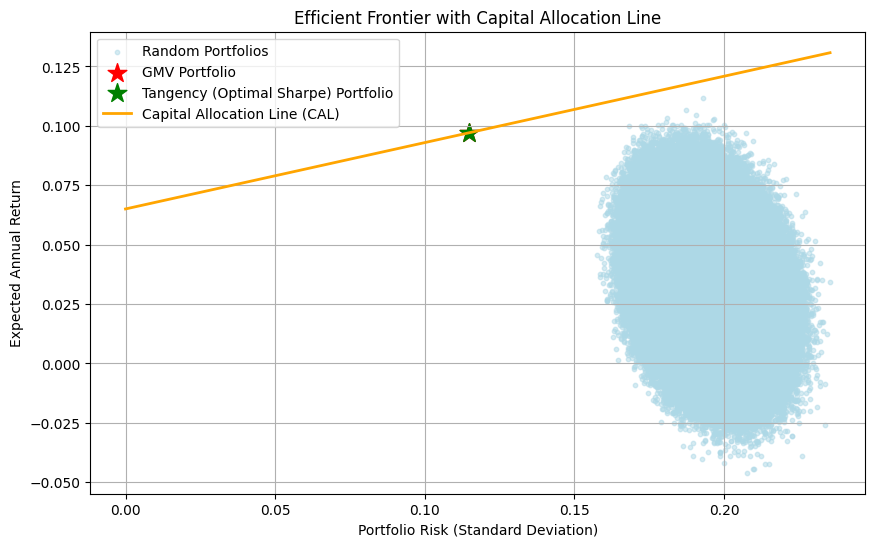

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Risk-free rate -----
rf = 0.065 # 6% annual risk-free rate

# ----- Tangency Portfolio (from earlier results) -----
tangency_return = expected_return       # e.g. 0.3245
tangency_risk = min_volatility          # or the risk of Sharpe-optimal portfolio if stored separately

# If you have a separate Sharpe-optimal risk and return, use those instead:
# tangency_return = sharpe_port_return
# tangency_risk = sharpe_port_risk

# ----- CAL Equation -----
# Create a range of portfolio standard deviations (risk)
cal_risk = np.linspace(0, portfolios['Annual Portfolio Risk'].max(), 100)
cal_return = rf + ((tangency_return - rf) / tangency_risk) * cal_risk

# ----- Plotting -----
plt.figure(figsize=(10, 6))
plt.scatter(portfolios['Annual Portfolio Risk'],
            portfolios['Annual Portfolio Return'],
            c='lightblue', alpha=0.5, s=10, label='Random Portfolios')

# Add GMV and Tangency Points
plt.scatter(min_volatility, np.dot(optimal_weights, annual_returns),
            color='red', marker='*', s=200, label='GMV Portfolio')

plt.scatter(tangency_risk, tangency_return,
            color='green', marker='*', s=200, label='Tangency (Optimal Sharpe) Portfolio')

# Plot the Capital Allocation Line
plt.plot(cal_risk, cal_return, color='orange', linewidth=2, label='Capital Allocation Line (CAL)')

# ----- Labels & Styling -----
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier with Capital Allocation Line')
plt.legend()
plt.grid(True)
plt.show()
